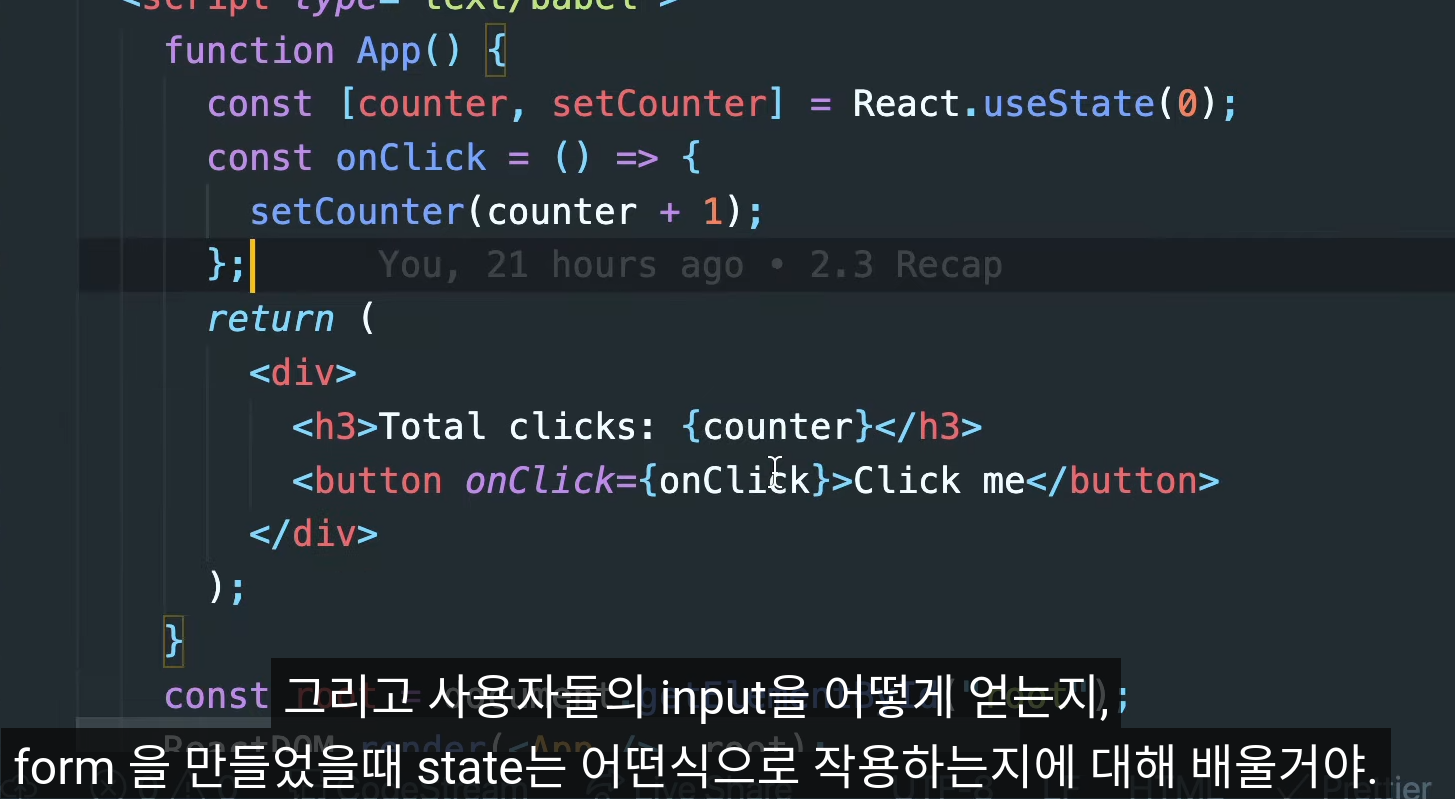

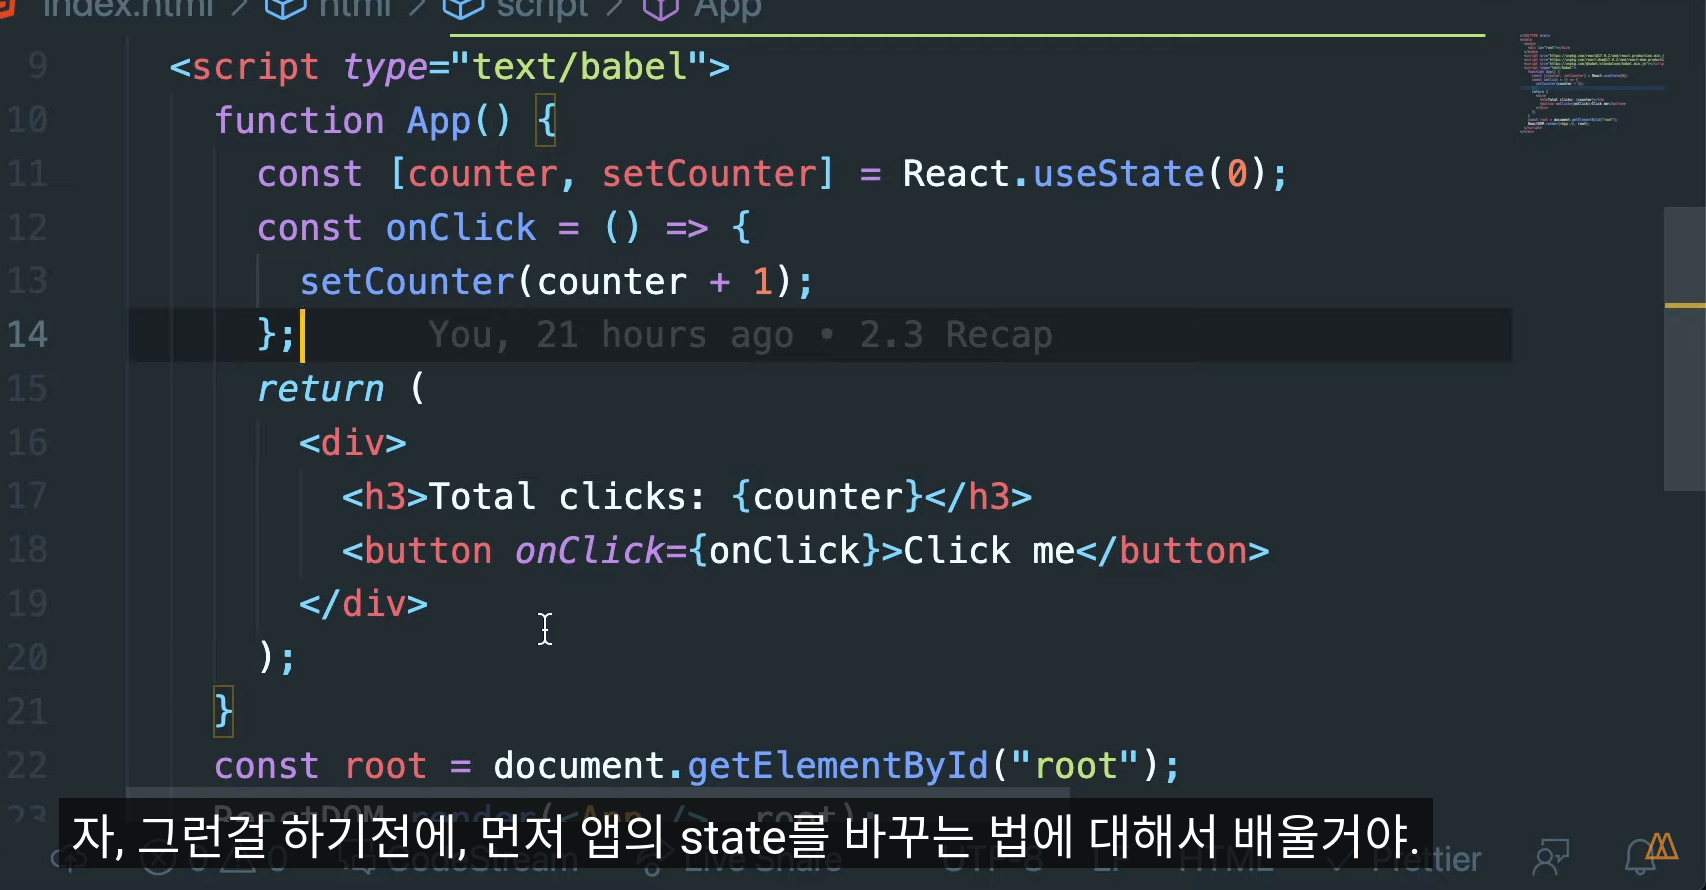

```jsx
<!DOCTYPE html>
<html>
  <body>
    <div id="root"></div>
  </body>
  <script src="https://unpkg.com/react@17.0.2/umd/react.production.min.js"></script>
  <script src="https://unpkg.com/react-dom@17.0.2/umd/react-dom.production.min.js"></script>
  <script src="https://unpkg.com/@babel/standalone/babel.min.js"></script>
  <script type="text/babel">
    const root = document.getElementById("root");
    function App() {
      const [counter, setCounter] = React.useState(0);
      return (
        <div>
          <h3>Total clicks: {counter}</h3>
          <button onClick={() => setCounter(counter + 1)}>Click me</button>
        </div>
      );
    }
    ReactDOM.render(<App />, root);
  </script>
</html>

```

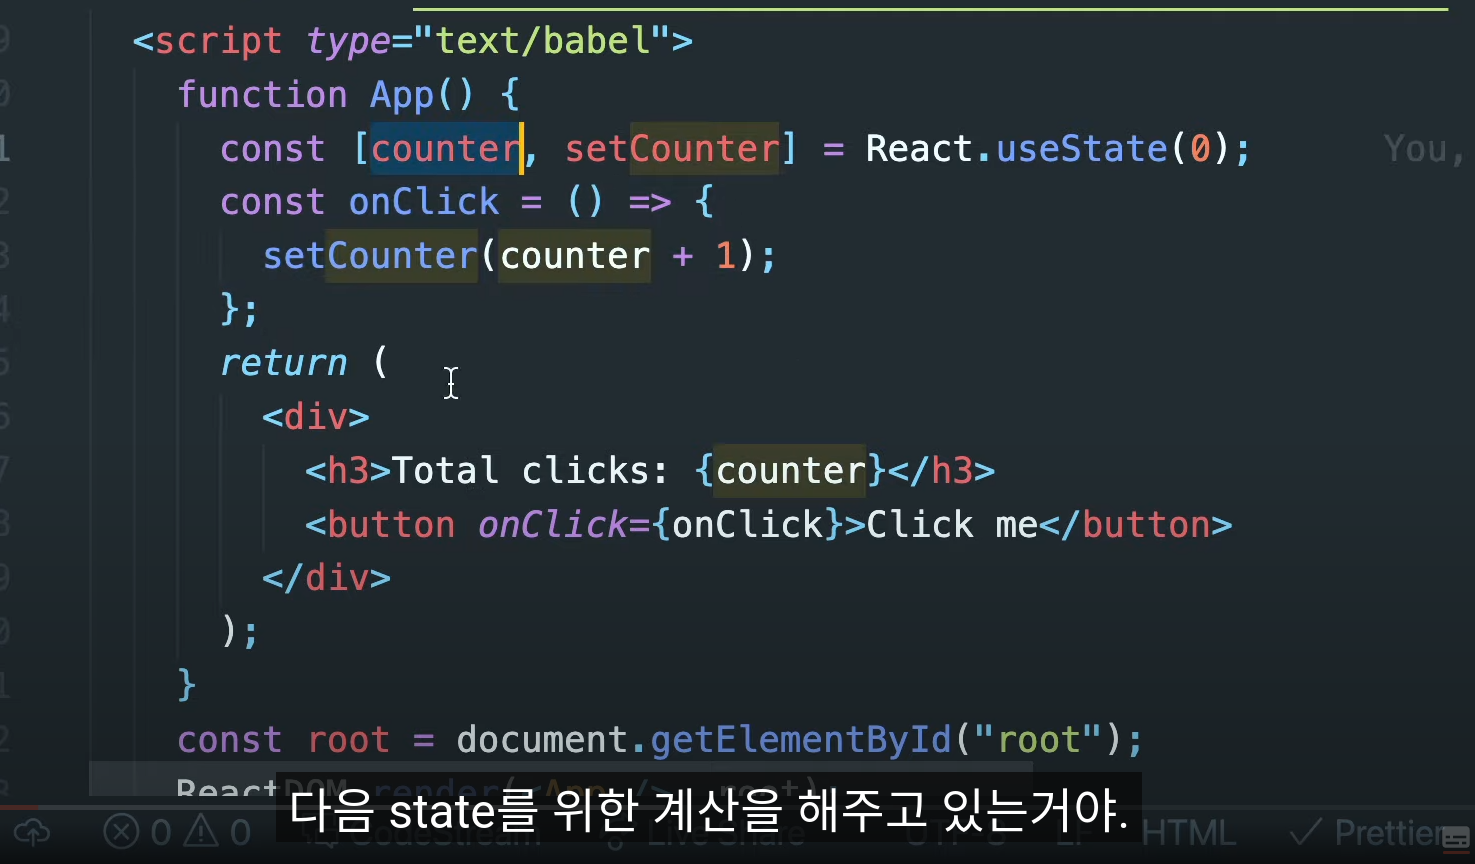

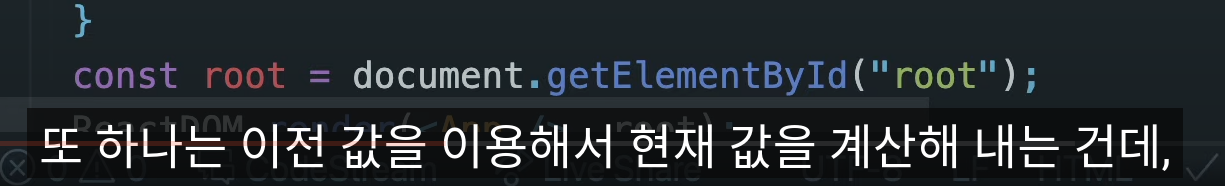

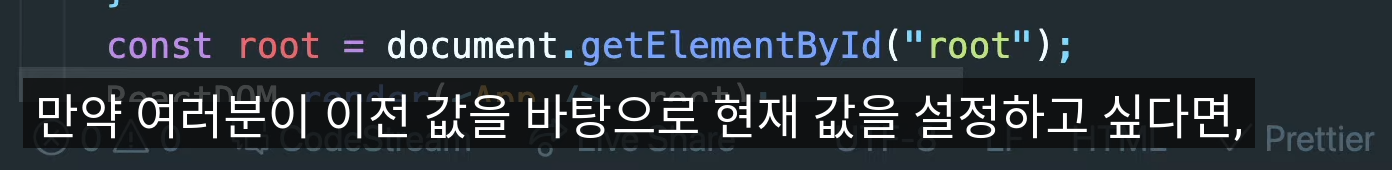

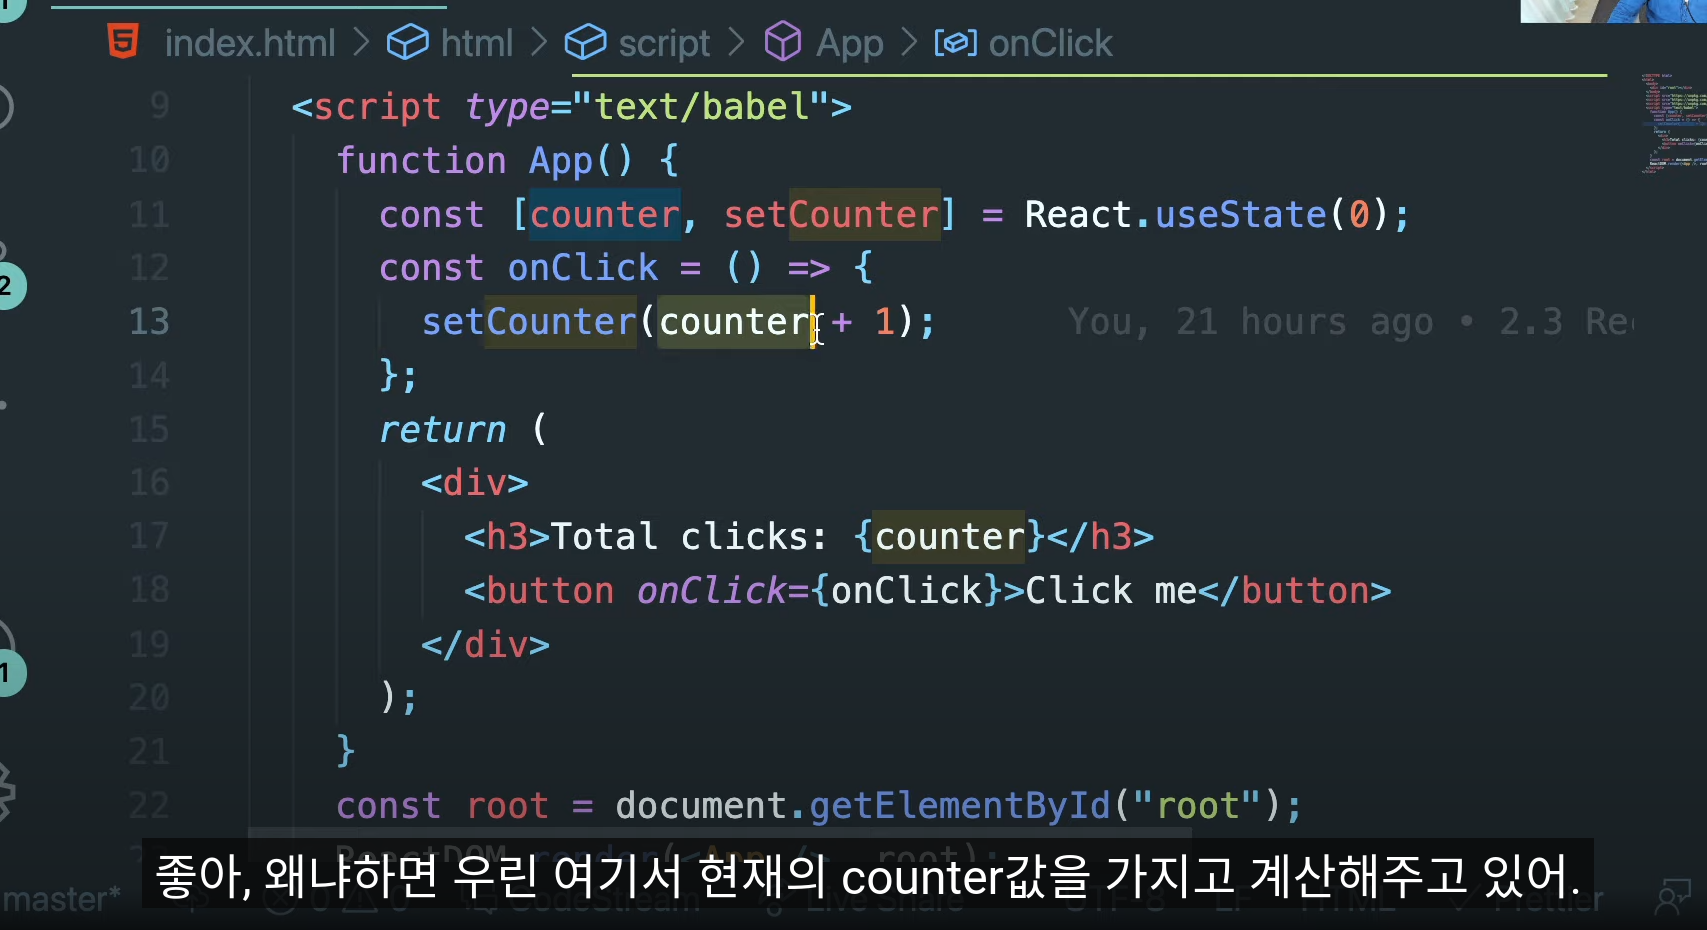

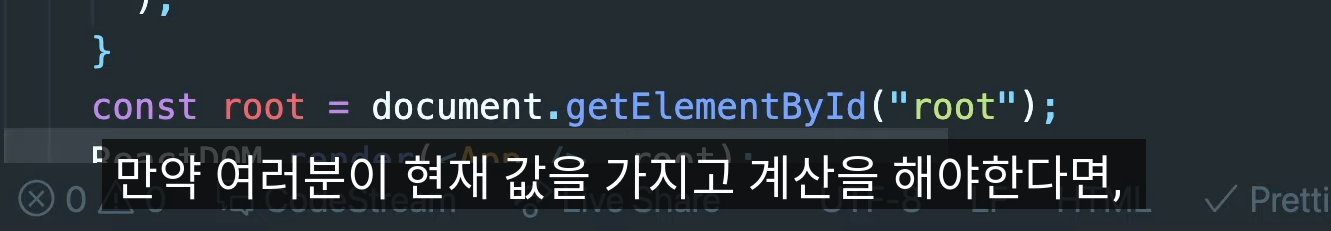

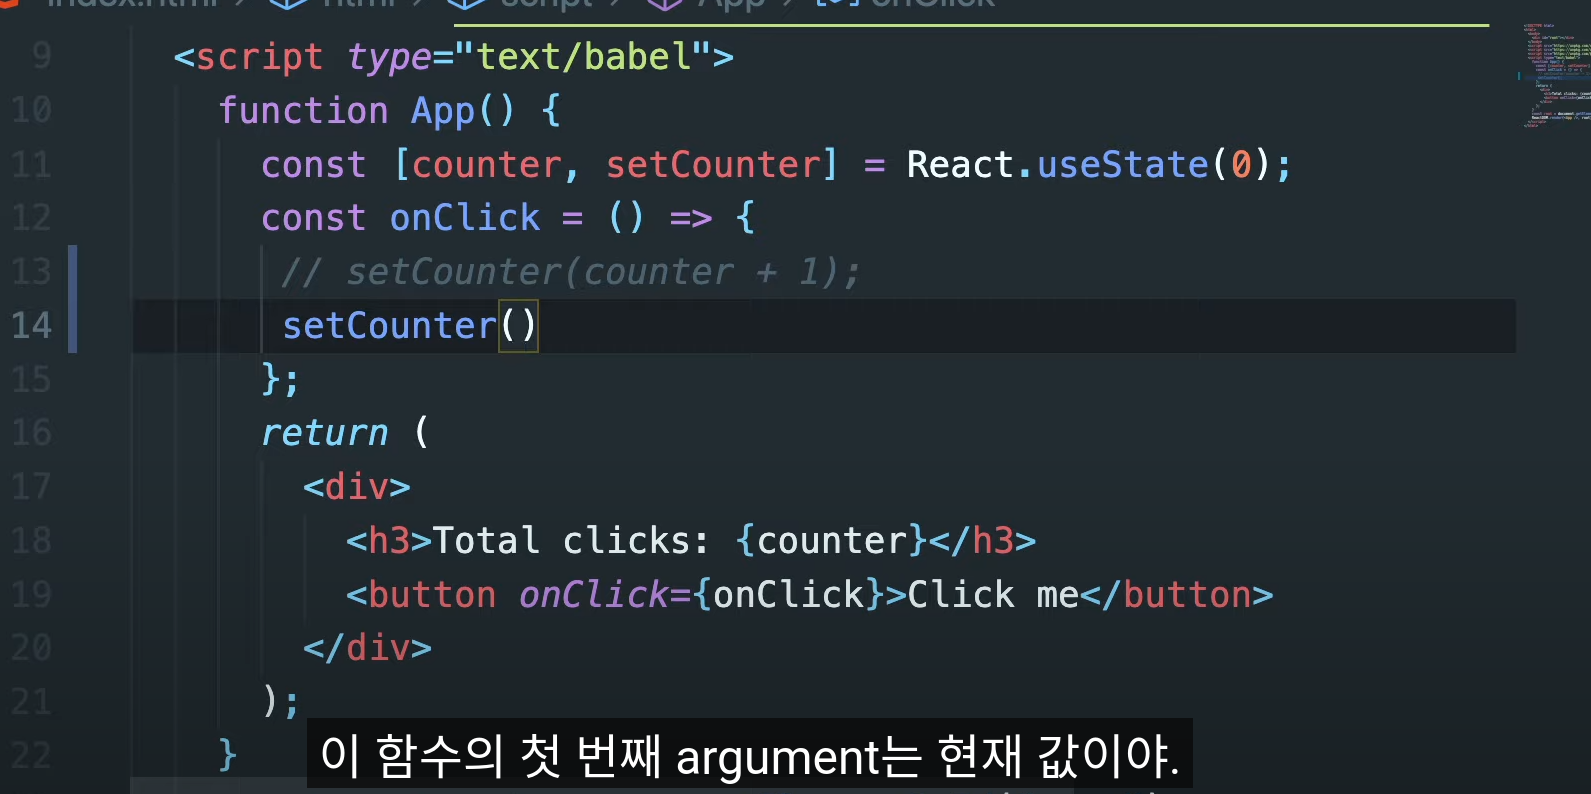

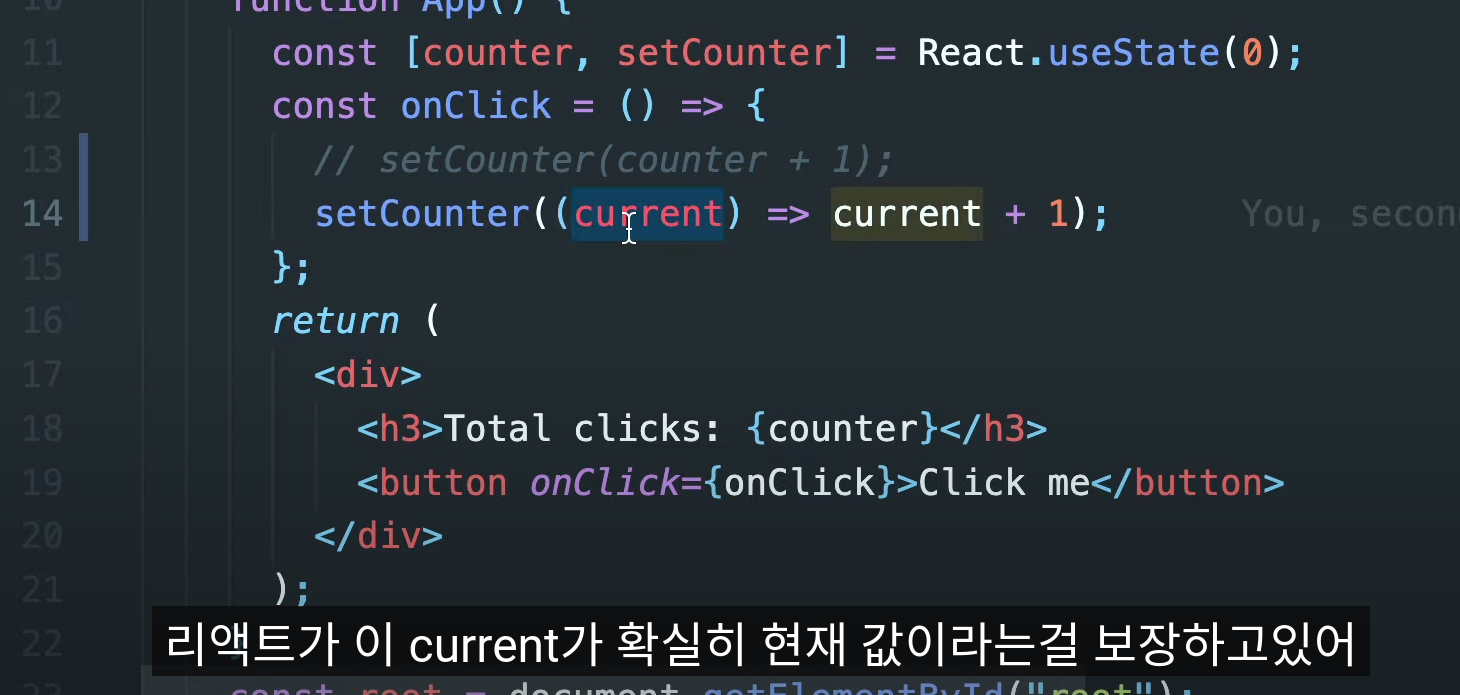

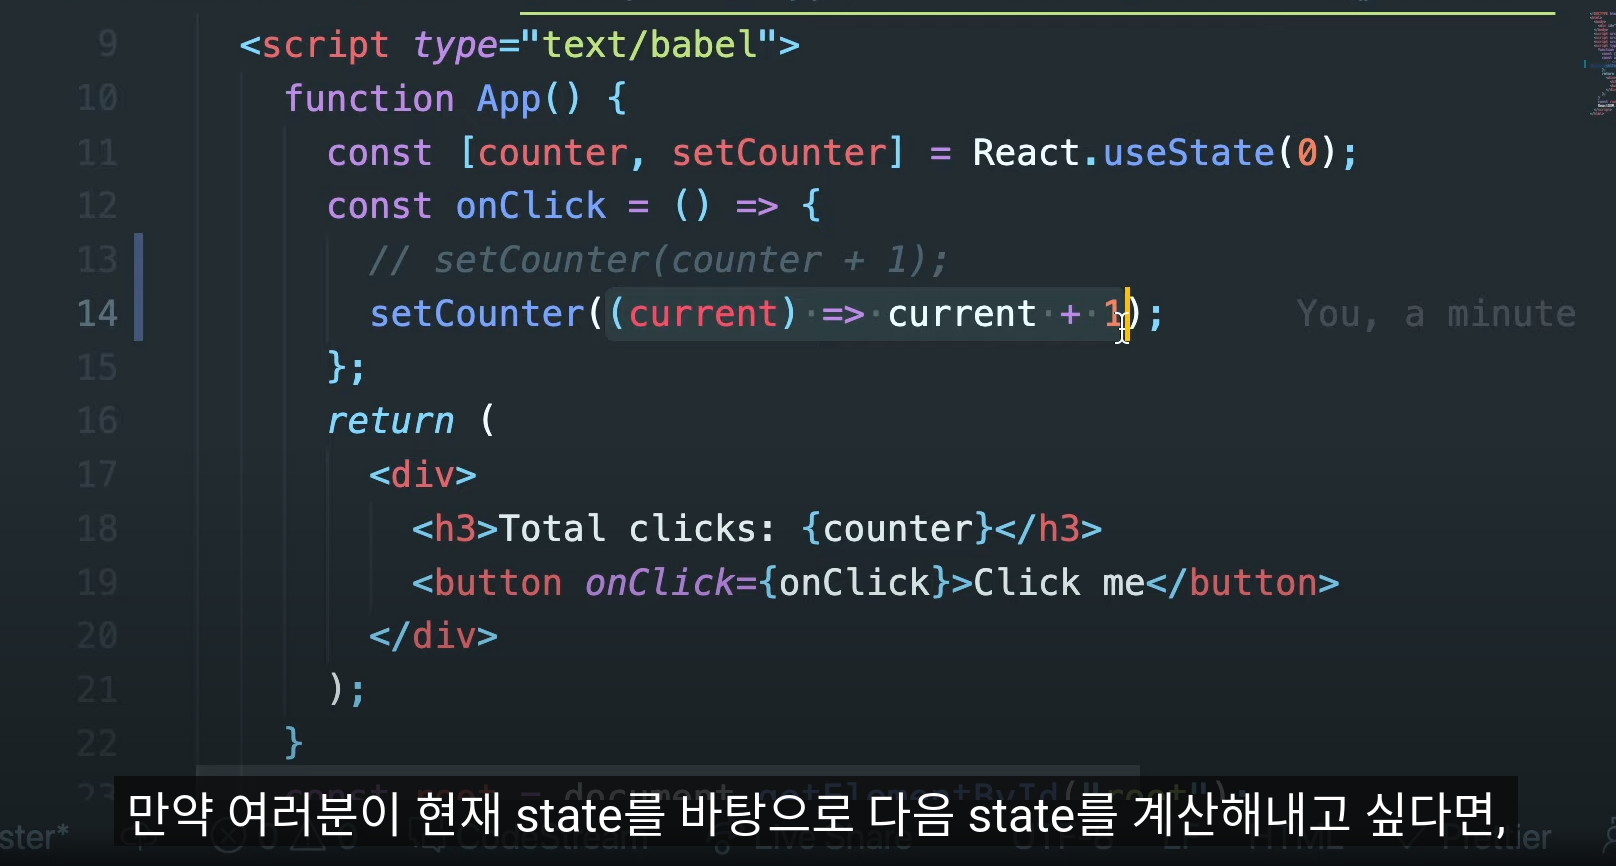

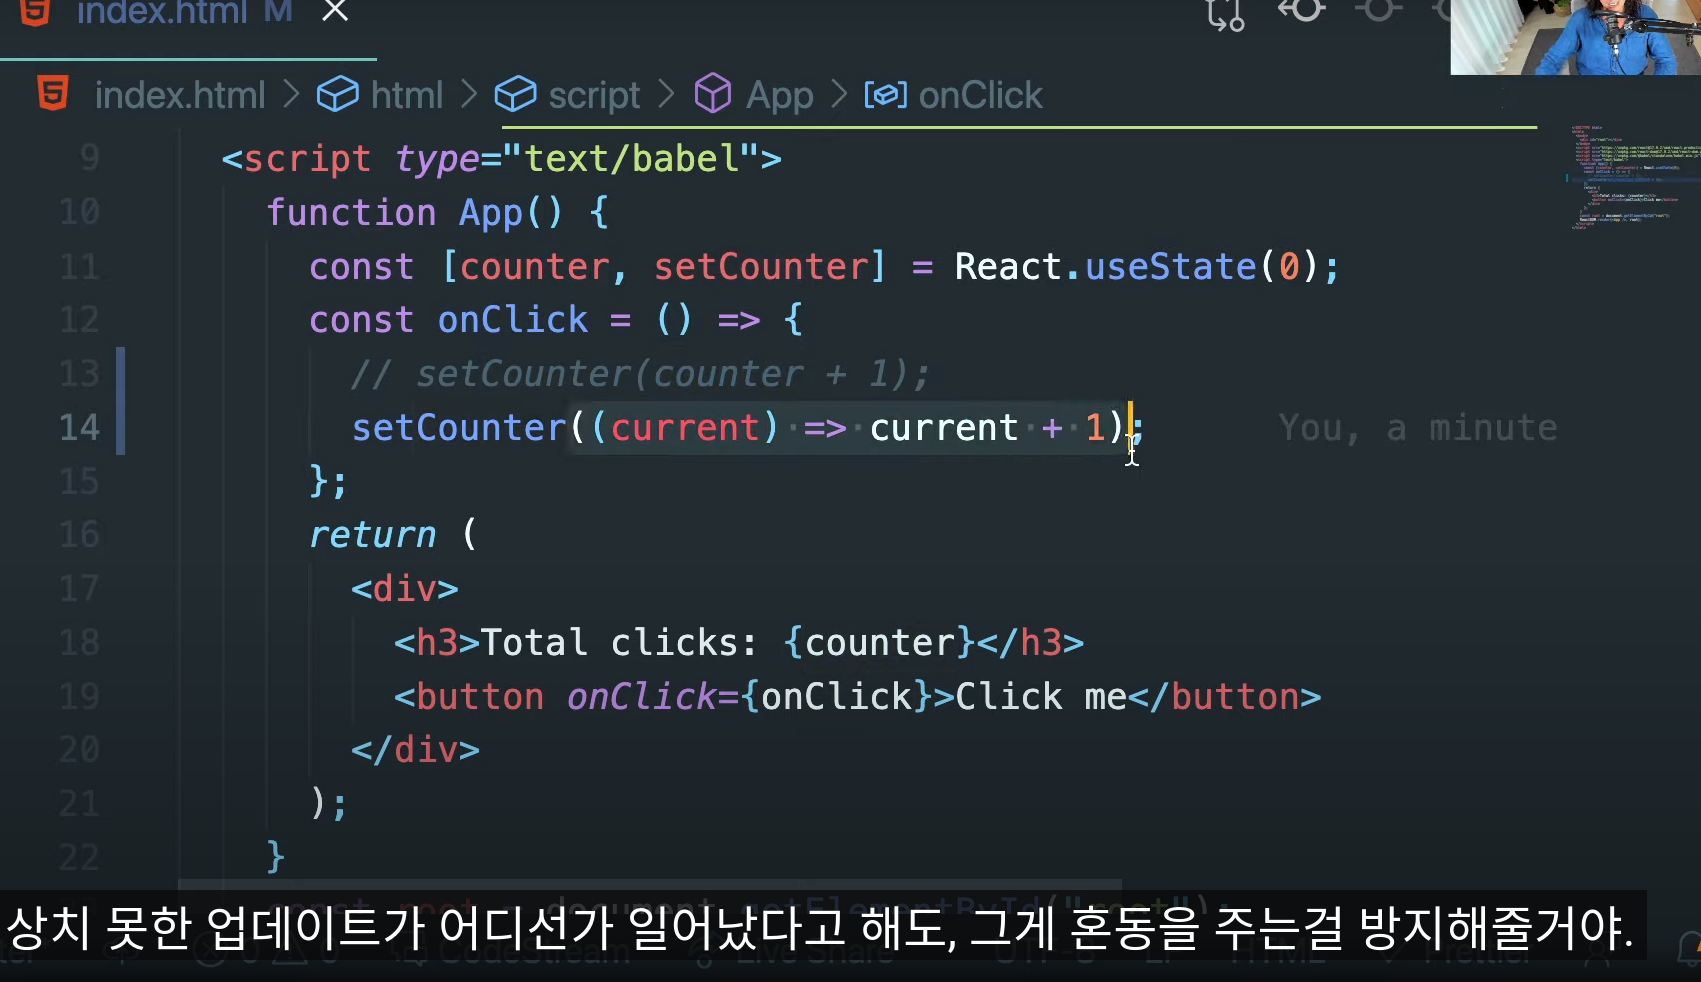

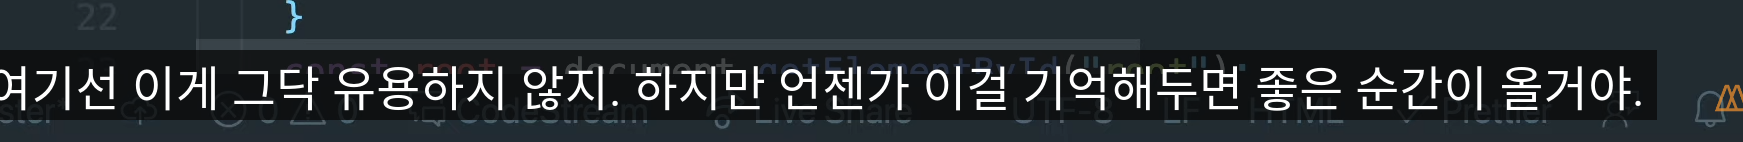

setCounter()에 값으로 넣을지 함수로 넣어줄지가 헷갈리신다면,
onClick 함수안에 여러번 넣어서 테스트해보시면 이해가 빠를 것 같습니다.

1. 값으로 여러번
```
function onClick() {
setCounter(counter + 1);
setCounter(counter + 1);
setCounter(counter + 1);
setCounter(counter + 1);
setCounter(counter + 1);
}
```
1번으로 돌렸을 경우에는 setCounter를 몇번을 호출해도 한 번만 실행되는 걸 보실 수 있고(counter가 1만 증가)


2. 함수로 여러번
```
function onClick() {
setCounter(current => current+ 1);
setCounter(current => current+ 1);
setCounter(current => current+ 1);
setCounter(current => current+ 1);
setCounter(current => current+ 1);
}

```
2번으로 돌렸을 경우에는 setCounter가 호출된 만큼 counter가 증가된 걸 볼 수 있습니다.

1번 로직을 보면 counter는 state를 할당한 변수이고 변수 counter 값을 참조하지만
current는 useStete의 state자체를 참조하여 다르게 나오는 것 같네요.

예를 들어, state가 1이라고 하면 1번 함수는 setCounter(counter +1)에서 counter = 1의 값을 가져와서 state= 2로 바꾸지만
같은 setCouner에서 다시 couter =1 을 참조해서 다시 state=2가 게속 반복되는 것 같네요.

2번 함수는 state 값을 참조해서 state=2, 3, 4... 이렇게 변경되는 것 이구요.

이유는 state가 변하고 re-rendering 되면서 counter의 값을 재할당하기 때문에 다르게 참조하는 걸로 이해

```jsx
<!DOCTYPE html>
<html>
  <body>
    <div id="root"></div>
  </body>
  <script src="https://unpkg.com/react@17.0.2/umd/react.production.min.js"></script>
  <script src="https://unpkg.com/react-dom@17.0.2/umd/react-dom.production.min.js"></script>
  <script src="https://unpkg.com/@babel/standalone/babel.min.js"></script>
  <script type="text/babel">
    const root = document.getElementById("root");
    function App() {
      const [counter, setCounter] = React.useState(0);

      const onClick = () => {
        // setCounter(counter + 1 );
        // setCounter(counter + 1 );
        // setCounter(counter + 1 );
        // setCounter(counter + 1 );
        // setCounter(counter + 1 );
        // setCounter(counter + 1 );
        // setCounter(counter + 1 );
        // setCounter((current) => current + 1);
        // setCounter((current) => current + 1);
        // setCounter((current) => current + 1);
        // setCounter((current) => current + 1);
        // setCounter((current) => current + 1);
        setCounter((current) => current + 1);
      };

      return (
        <div>
          <h3>Total clicks: {counter}</h3>
          <button onClick={onClick}>Click me</button>
        </div>
      );
    }
    ReactDOM.render(<App />, root);
  </script>
</html>

```